In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#### Trees for Classification

data = pd.read_csv("C:\AAAAAAAAAA\AI Masterclass UoSJP\Day - 30\BreastCancer.CSV")

data.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1

In [3]:
x = data.iloc[:,:9].values
y = data.iloc[:,9].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [14]:
# Decision Tree Classification

clt = DecisionTreeClassifier()
model = clt.fit(x_train, y_train)

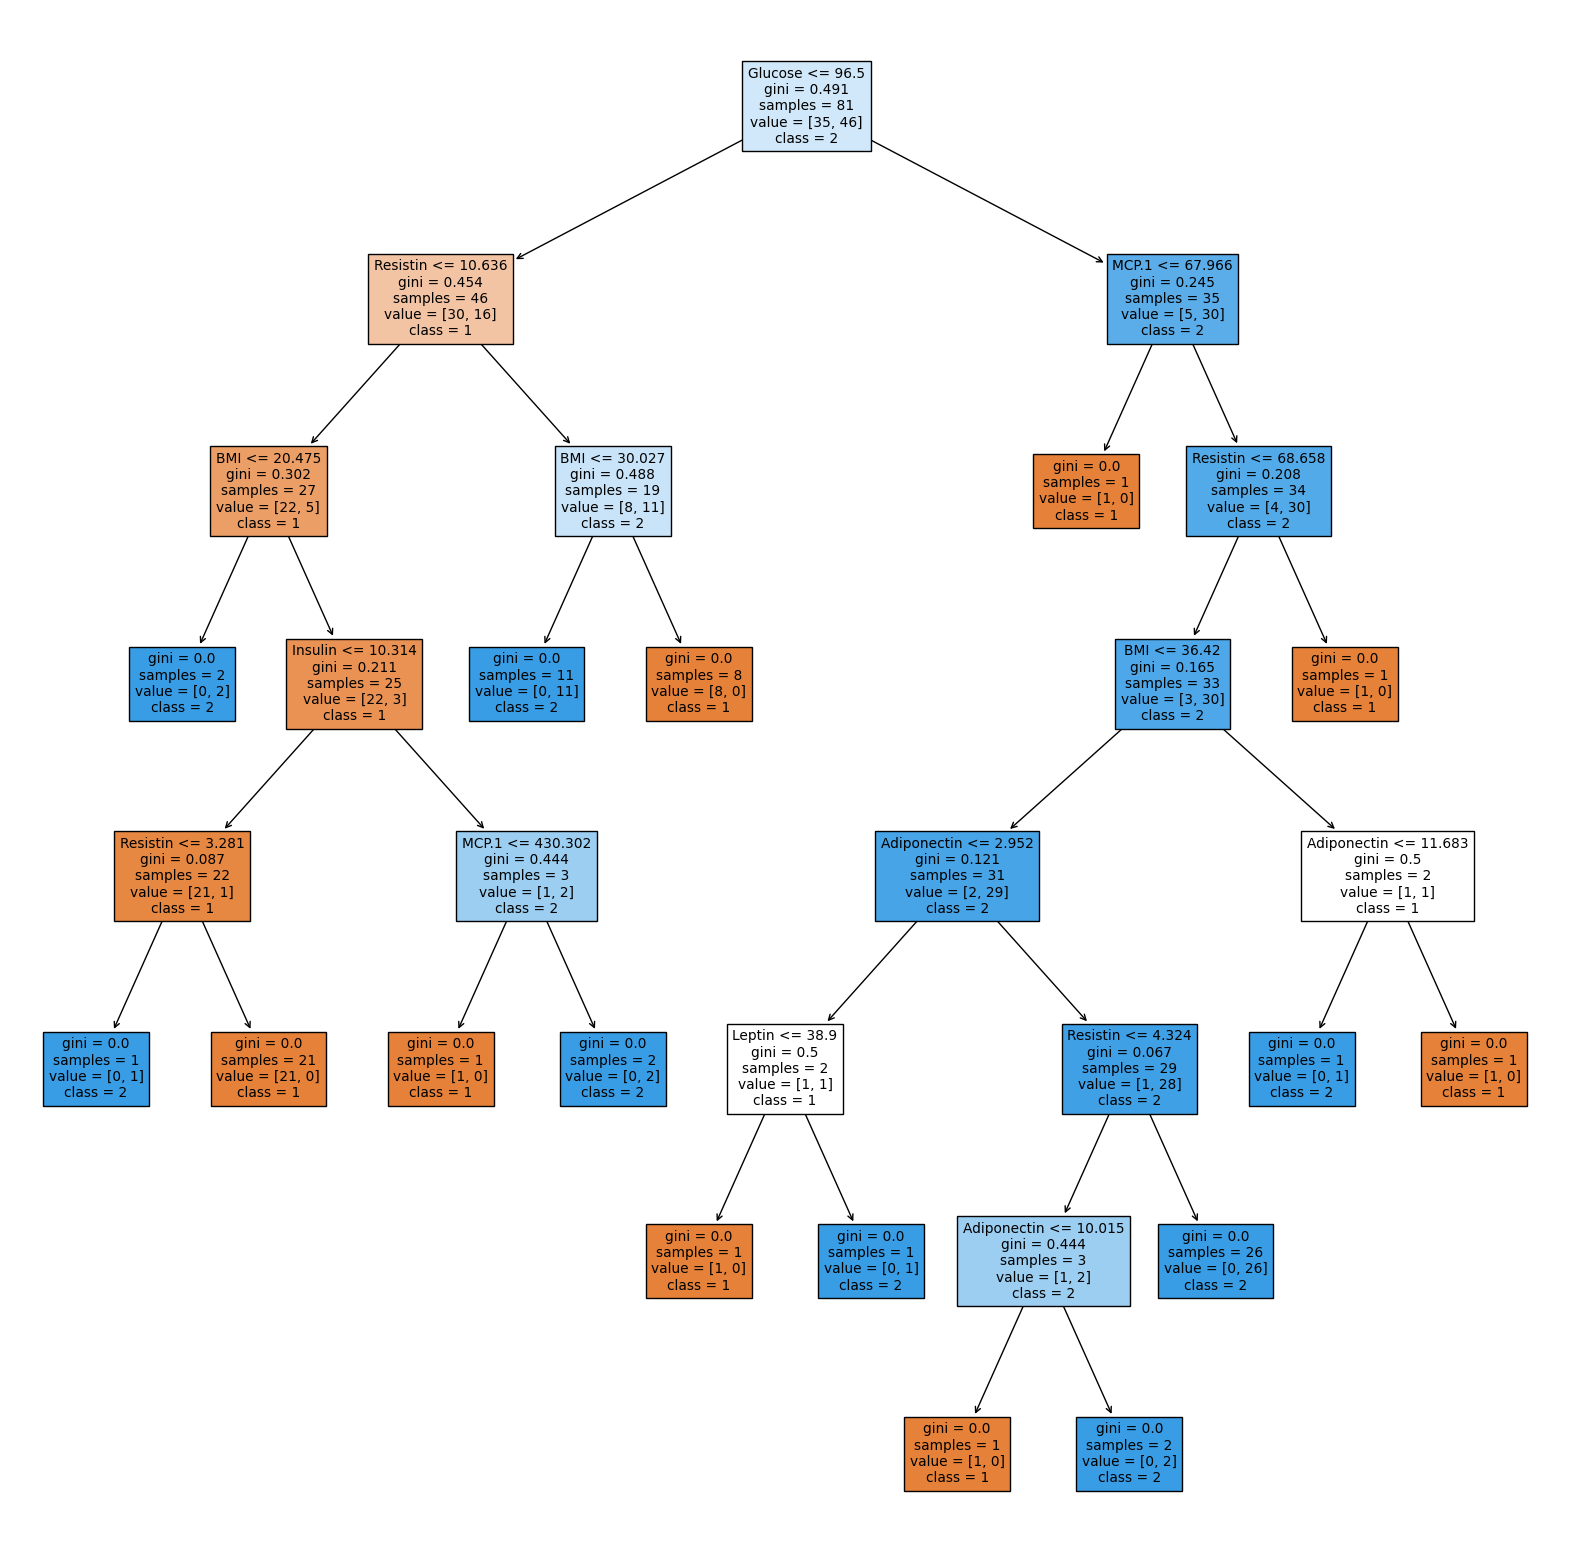

In [15]:
# Visualization

plt.figure(figsize  = (20,20))
plot_tree(clt, feature_names = data.columns, class_names = ["1", "2"], filled=True)
plt.show()

In [16]:
## Predictions and accuracy

y_pred = clt.predict(x_test)

y_pred

array([1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2], dtype=int64)

In [17]:
y_test

array([1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1], dtype=int64)

In [18]:
#Accuracy

sum(y_pred == y_test)/len(y_test)

0.6285714285714286

In [19]:
accuracy_score(y_test, y_pred)

0.6285714285714286

In [20]:
#Miss Classification Error

sum(y_pred != y_test)/len(y_test)

0.37142857142857144

In [21]:
#Confusion Matrix

confusion_matrix(y_test ,y_pred)

array([[ 8,  9],
       [ 4, 14]], dtype=int64)

In [22]:
#Classification Report

print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           1       0.67      0.47      0.55        17
           2       0.61      0.78      0.68        18

    accuracy                           0.63        35
   macro avg       0.64      0.62      0.62        35
weighted avg       0.64      0.63      0.62        35



In [23]:
# Pruining tree

cltp = DecisionTreeClassifier(max_depth=3)

cltp.fit(x_train ,y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
cltp

DecisionTreeClassifier(max_depth=3)

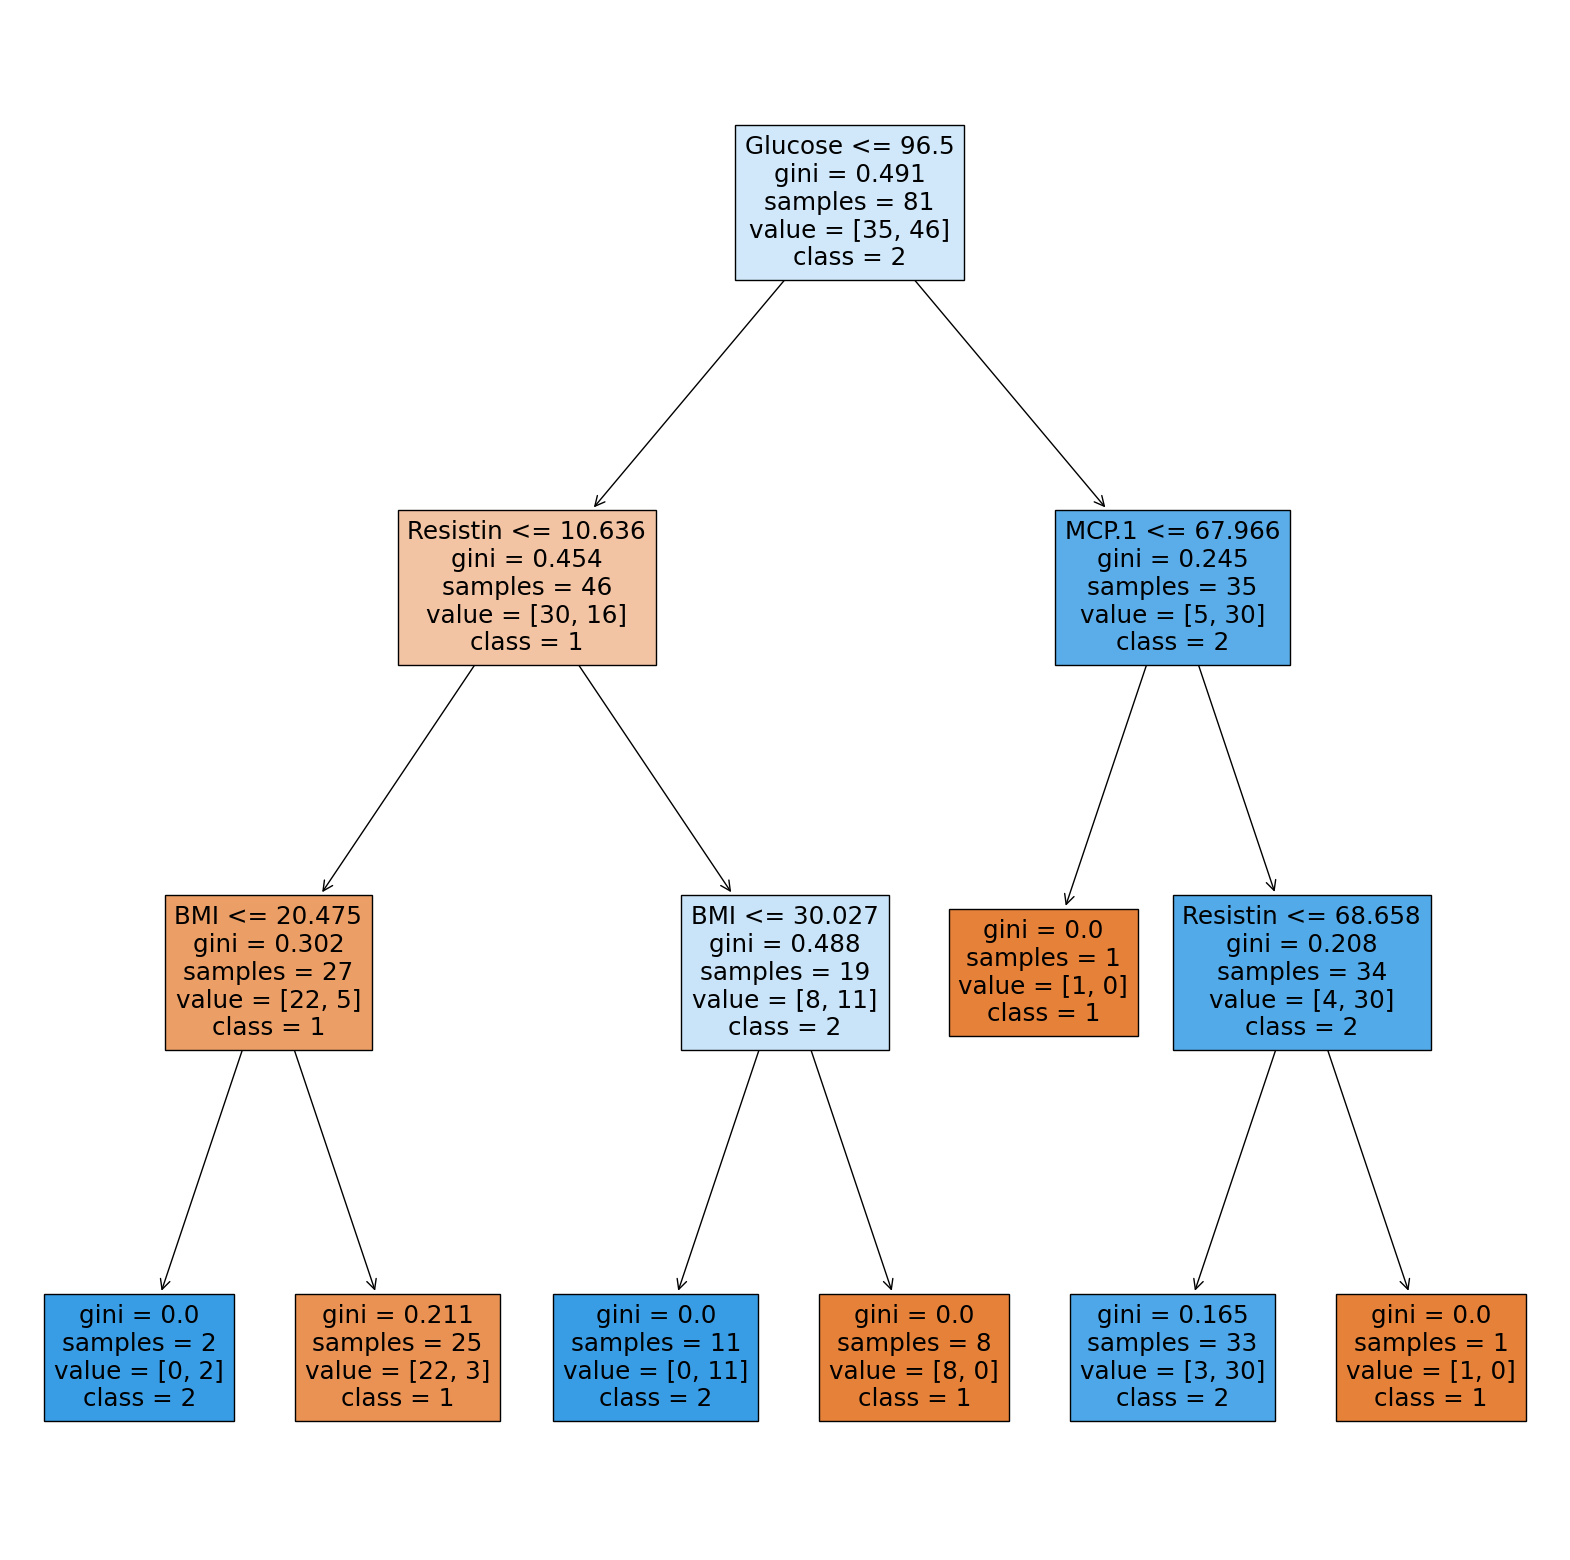

In [29]:
plt.figure(figsize = (20, 20))
plot_tree(cltp, feature_names = data.columns, class_names = ["1", "2"], filled = True)
plt.show()

In [32]:
y_pred = cltp.predict(x_test)

accuracy_score(y_test, y_pred)

0.6571428571428571

In [33]:
# Trees for Regression

data = pd.read_csv("C:\\AAAAAAAAAA\\AI Masterclass UoSJP\\Day - 30\\Boston.CSV")

data.head()

crim    zn  indus    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [34]:
x = data.iloc[:,:12].values
y = data.iloc[:,12].values

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
# Decision Tree Regression

rgt = DecisionTreeRegressor(max_depth=3,)
rgt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

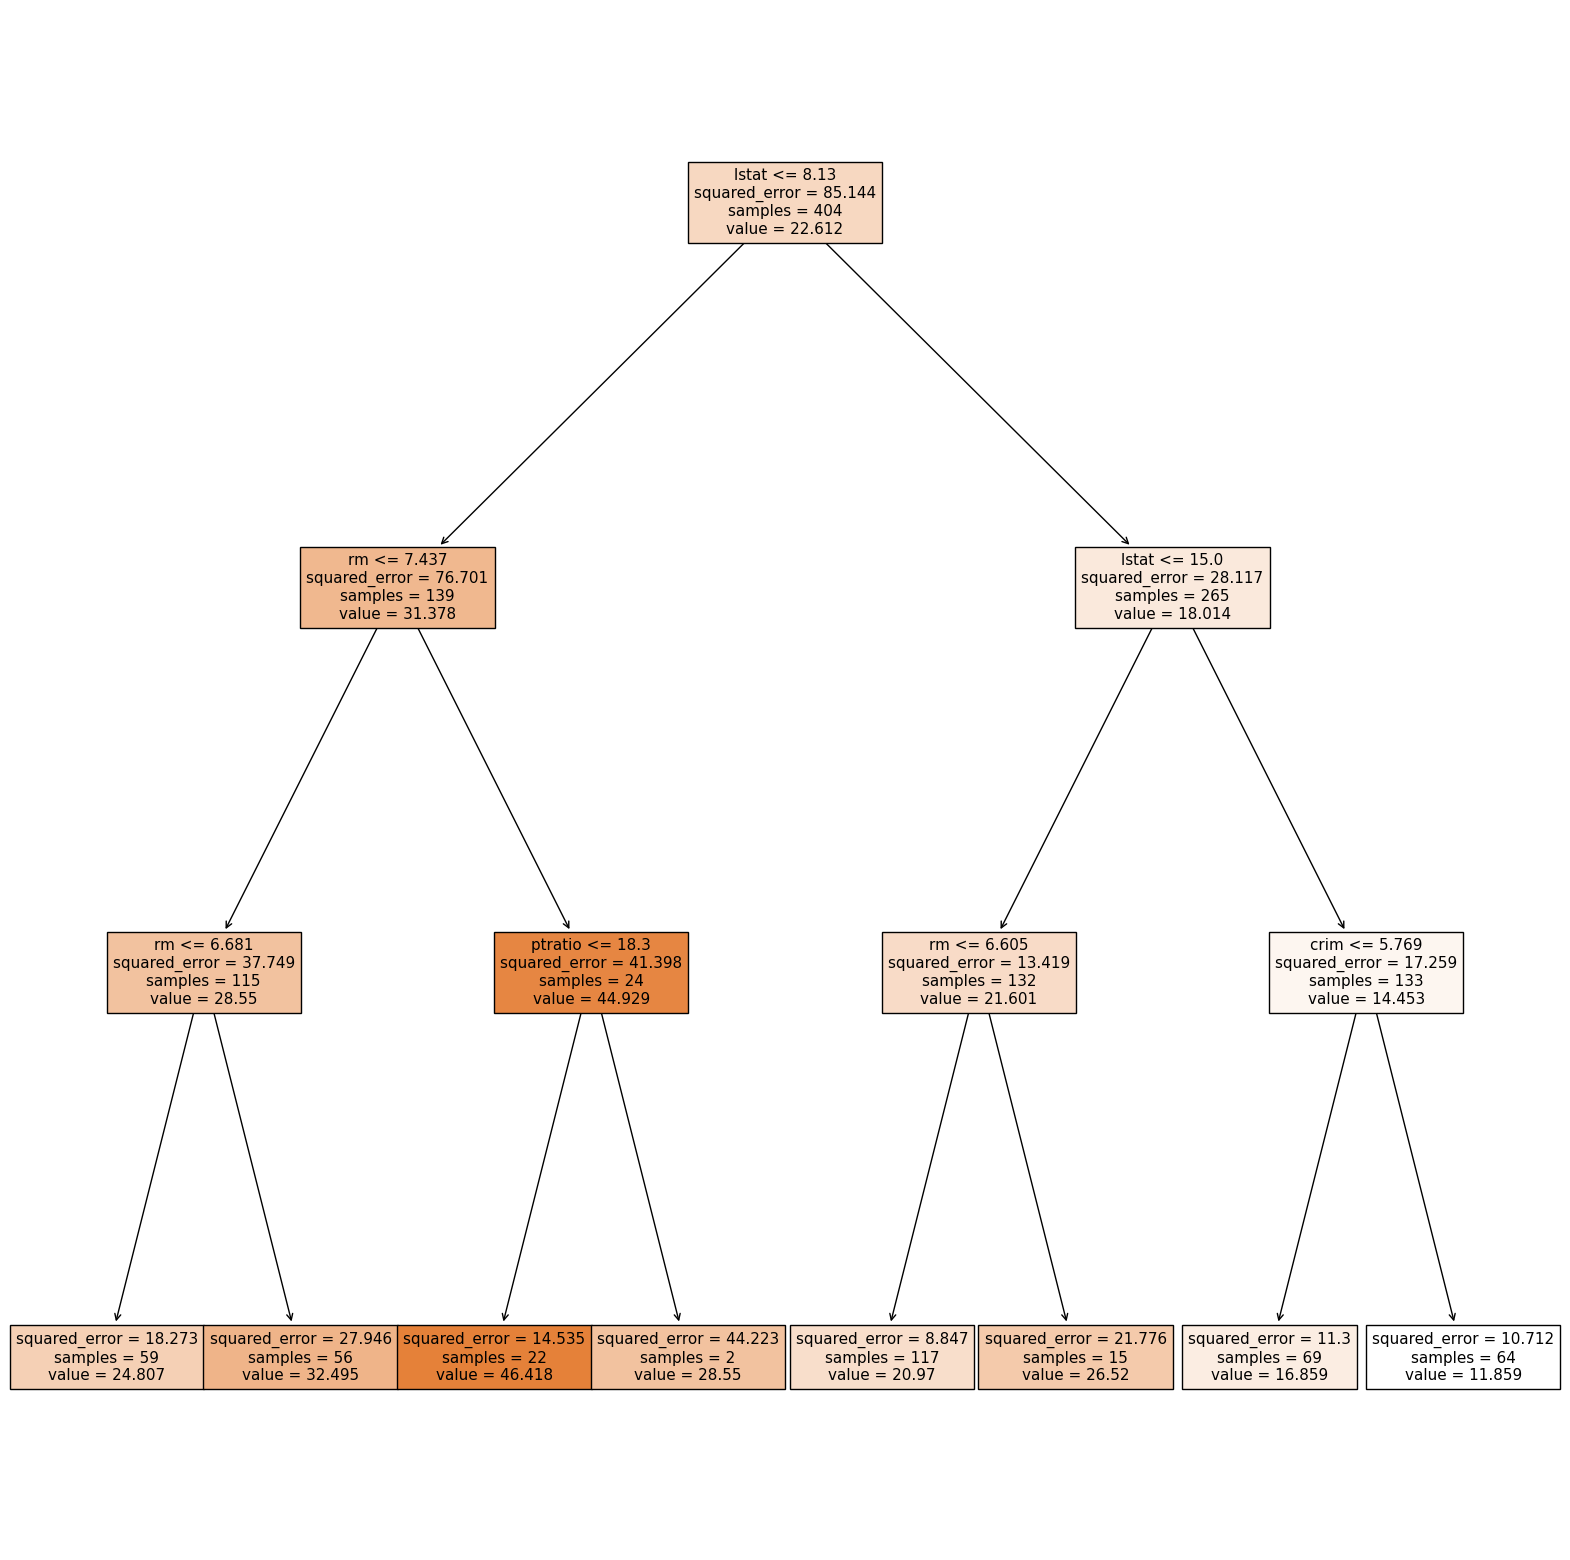

In [37]:
plt.figure(figsize=(20,20))
plot_tree(rgt,feature_names=data.columns,filled=True)
plt.show()

In [38]:
# Predictions & accuracy

y_pred = rgt.predict(x_test)
y_pred

array([24.80677966, 20.97008547, 20.97008547, 11.859375  , 20.97008547,
       20.97008547, 20.97008547, 20.97008547, 20.97008547, 20.97008547,
       11.859375  , 11.859375  , 11.859375  , 11.859375  , 46.41818182,
       32.49464286, 20.97008547, 32.49464286, 24.80677966, 20.97008547,
       24.80677966, 20.97008547, 20.97008547, 24.80677966, 20.97008547,
       20.97008547, 20.97008547, 16.85942029, 46.41818182, 16.85942029,
       11.859375  , 20.97008547, 20.97008547, 20.97008547, 20.97008547,
       20.97008547, 11.859375  , 20.97008547, 11.859375  , 11.859375  ,
       20.97008547, 20.97008547, 20.97008547, 11.859375  , 20.97008547,
       20.97008547, 16.85942029, 16.85942029, 16.85942029, 26.52      ,
       16.85942029, 16.85942029, 20.97008547, 28.55      , 16.85942029,
       16.85942029, 20.97008547, 20.97008547, 20.97008547, 16.85942029,
       24.80677966, 20.97008547, 32.49464286, 24.80677966, 20.97008547,
       24.80677966, 16.85942029, 16.85942029, 11.859375  , 20.97

In [39]:
y_test

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8])

In [40]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.780248099742715